<a href="https://colab.research.google.com/github/SowmyaAnilkumar/learning/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


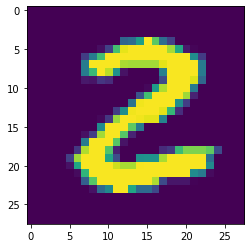

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[25])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3,3, activation='relu'))
model.add(Convolution2D(128, 3,3, activation='relu'))
model.add(Convolution2D(256, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(Convolution2D(64, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWar

In [51]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 10, 10, 32)        8224      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 8, 8, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.1589 - acc: 0.9506
Epoch 2/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0573 - acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0437 - acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0359 - acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0297 - acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.0245 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0216 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0191 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0172 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 21s 353us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [55]:
print(score)

[0.036772052522547165, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [57]:
print(y_pred[:9])
print(y_test[:9])

[[9.24858690e-10 6.37098013e-11 6.69796130e-09 3.80035914e-09
  4.55330735e-15 1.48031656e-11 2.90888783e-17 1.00000000e+00
  1.10890680e-11 2.44825688e-11]
 [8.02588488e-07 1.51547647e-06 9.99997735e-01 8.45455439e-09
  3.22440479e-13 1.22944181e-14 5.36303491e-09 2.25678712e-10
  3.71213860e-09 3.20959242e-13]
 [5.65657281e-08 9.99976993e-01 1.63967002e-06 9.04801678e-10
  8.56864790e-06 2.01083751e-07 1.37425701e-07 1.08176237e-05
  1.56437966e-06 8.15143295e-08]
 [9.99988317e-01 1.73234653e-14 3.50571305e-08 3.46937878e-09
  4.55144228e-10 7.34053316e-08 1.11079808e-05 1.44786971e-09
  2.52934740e-07 2.41607410e-07]
 [4.18128328e-15 1.08037355e-11 1.40498013e-11 2.27677967e-14
  1.00000000e+00 5.61227683e-15 7.04821240e-15 9.81834197e-11
  8.18052071e-10 1.45486456e-10]
 [1.25429708e-07 9.99927759e-01 1.61047808e-06 1.51177321e-10
  4.28910289e-06 9.65774927e-09 6.94039270e-09 6.39910941e-05
  2.05812444e-06 6.38036752e-08]
 [6.24285668e-19 9.01761332e-09 5.74734596e-13 5.08417805e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()